# Tutorial #4 - Analyze data
Welcome to the IBM Data Scientist Workbench. This notebook is the **fourth** in a series of "getting started" tutorials that is designed to introduce some basic concepts and help get you familiar with using the workbench.

In this notebook we introduce you to the search feature and perform some analysis on our winter medal data set.  Specifically, this tutorial covers:

1. How to use sidebar to find previous work
1. Analysis: Predicting medal counts
    * Probability distribution
    * Bayesian inference
    * Results

## Pre-requisites
Though not required, it is recommended that you complete the other tutorials as well before proceeding. You can eiher download previous tutorial notebooks from the [Welcome](/pages/welcome) page or use Sidebar to find them. 

## Sidebar: How to find previous work?
In a previous tutorial notebook in this getting started series, you loaded the olympic medal data set and calculated and plotted the total medals that Norway had been awarded at each olympic games from 1924 through 2006.

Do you remember the lines of code we used to do this?  For that matter, do you remember which notebook the code is in?

Once you have created even just a few notebooks, remembering what you did and in which notebook is a common problem (at least for the IBM Data Scientist team, it is).  This is why the Data Scientist Workbench includes the ability to search notebooks.

You can use the search feature to find and reproduce the Norway medal plot.

<div class="alert alert-block alert-info" style="margin-top: 20px">**Note:** Search matches against the following
<ol>
<li>File names and paths (all types)</li>
<li>File tags (all types)</li>
<li>Notebook content (source cells only)</li>
</ol>
</div>

For example, if you want to find the notebook where you loaded the medals data, and look at the lines of code into this notebook. 

1. In the search bar, enter the text `read_csv`.  You should see a new "Search - read_csv" view containing a list of search hits.  Among the hits should be *this* notebook (because it contains the search term), **Tutorial #2 - Explore and Visualize**, and perhaps others.
2. In the "Search - read_csv" view, open the **Tutorial #2 - Explore and Visualize** notebook by clicking its link.


### Load Medals Data
If you have not loaded the medals data before, you can load it by taking
following steps:

1. Download the olympic medal data in CSV format.  Click this [Box link](https://ibm.box.com/s/8u9yc1hj7ddvptablj312asm6sfgn5gw) to open the document in a new browser window. 
1. Save the CSV file to your computer by clicking on the Download button.
1. Drag the CSV file from your desktop onto the workbench (Note that the CSV file appears under your **Recent Data** panel in the sidebar.)
1. Click the arrow button (**>**) next to the CSV file you just uploaded.
1. In the section that appears below the item, click "Rename"
1. Change the name of the file to "medals.csv" and press Enter or click outside the name.
1. Execute the code cell by clicking the (**&#9658;**) play button on the notebook toolbar, or by pressing Ctrl-Enter.

In [1]:
import pandas
medals_df = pandas.read_csv('/resources/medals.csv')
# Prune non-data rows
medals_df = medals_df.dropna()

### Plot Medal Count per Year (Norway)
Same as **Tutorial #2 - Explore and Visualize** notebook, we plot the model count for Norway. You can find the notebook where you plotted the medal count for Norway for all winter olympic games. 

1. In the search bar, enter the text `nor_medals_year`.  You should see a new "Search - nor_medals_year" view containing a list of search hits. 
2. In the "Search - nor_medals_year" view, open the **Tutorial #2 - Explore and Visualize** notebook by clicking its link.
3. Locate the code cells that contain `nor_medals_year` and copy and paste their contents in the code cell below.  There should be a line of code to calculate the medal counts, and one to plot the result.

In [2]:
# tell the notebook to render charts inline
%matplotlib inline

In [3]:
nor_medals_year = medals_df[medals_df.NOC == 'NOR'].groupby('Year').size()

## Analysis: Probable Medal Count
In the **Tutorial #2 - Explore and Visualize** notebook, you determined that Norway had won the most combined medals - *in every color* - of any country from 1924 through 2006.  Clearly, Norway is a winter olympic juggernaut.

If it were January 2010, and you had a Norwegian friend that insisted that you answer the question, "How many medals do you think Norway will win in this year's olympics?", what would you tell her?  What if she asked you the same question in January 1988 (you've been friends a long time).  Would you give her the same answer?

Looking at the medal count per games for Norway, you notice that *something* changed circa 1992, and Norwegian olympians began to win more medals in every winter olympics since then.  You would not likely have given Norway much chance at all to win 20 medals in 1988, but in 2010, the chances that Norway would win 20 medals seems a good bit higher.

<div class="alert alert-block alert-info" style="margin-top: 20px">The following example and code is based on the text message example that can be found in <a href="http://nbviewer.ipython.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/6f3a973657b0d3f92bea63b154eadd1590b98e1e/Chapter1_Introduction/Chapter1.ipynb">Probabilistic Programming and Bayesian Methods for Hackers, Chapter 1</a>.</div>

### Probability Distribution
You like stats, so you decide to provide your friend with a [probability distribution](http://en.wikipedia.org/wiki/Probability_distribution) for Norway's medal counts.

You let M be the medal count awarded to a country during an olympic games competition. You assume that M is a random variable (there are, after all, many things that may affect the outcome of an olympic competition).  You further assume that there exists a function that gives the probability that each medal count occurs.  Because medal count is discrete (0, 1, 2, 3, and so on - you cannot win 11.42 medals), this function is known as a [probability mass function](http://en.wikipedia.org/wiki/Probability_mass_function).

You assume that the probability mass function that governs medal count follows a [Poisson distribution](http://en.wikipedia.org/wiki/Poisson_distribution).  That is, the probability of the medal count M is equal to the number of medals n is governed by the equation:

$$P(M = n) =\frac{ \lambda^n e^{-\lambda} }{n!}, \; \; n=0,1,2, \dots $$

From the equation, you can see the probability is dependent on $\lambda$.  $\lambda$ is what you need to find to produce the medal count probability distribution for your Norwegian friend.

The value of $\lambda$ determines the shape of the probability distribution.  Two very different $\lambda$s will produce two very different distributions.  To illustrate this, you can plot a Poisson distribution with two different values of $\lambda$.

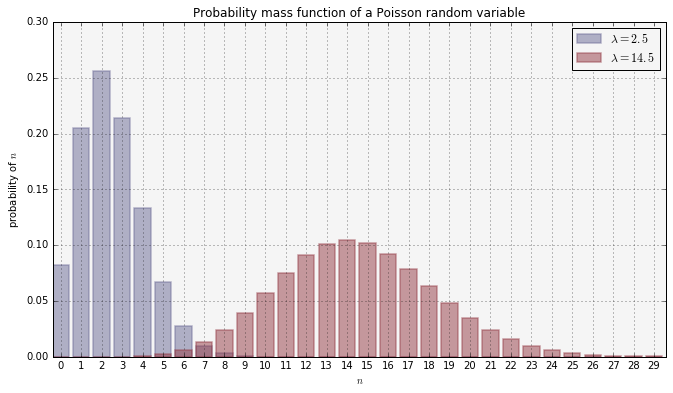

In [11]:
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['axes.facecolor'] = '#F5F5F5'

figsize(11, 6)

import scipy.stats as stats
a = np.arange(30)
poi = stats.poisson
lambdas = [2.5, 14.5]
colors = ["#6B6A96", "#943A45"]

# plot a Poisson distribution for each lambda
for lambda_, color in zip(lambdas, colors):
    plt.bar(a, poi.pmf(a, lambda_), color=color,
            label="$\lambda = %.1f$" % lambda_, alpha=0.50,
            edgecolor=color, lw="1.5")

plt.title("Probability mass function of a Poisson random variable")
plt.legend()
plt.grid()
plt.ylabel("probability of $n$")
plt.xticks(a + 0.4, a)
plt.xlabel("$n$")
plt.show()

Pretend this was the plot of our medal count distribution.  The lower value of $\lambda$ = 2.5 would produce higher probabilities for lower medal counts (25% chance of winning 2 medals, but virtually no chance of winning 15 medals), whereas the higher $\lambda$ = 14.5 would assign higher probabilities for higher medal counts (virtually no chance of winning 0 medals, but much greater chance of a medal count in the teens).

So what is $\lambda$ for Norway's medal count?  Well, from Norway's historical medal count plot, you observed that something changed in 1992, so you suspect that Norway's historical medal count is actually governed by *two* different values of $\lambda$: the $\lambda_1$ pre-1992 olympics, and the $\lambda_2$ post-1992 olympics.  In other words,

$$
\lambda = 
\begin{cases}
\lambda_1  & \text{if } t \lt \tau \cr
\lambda_2 & \text{if } t \ge \tau
\end{cases}
$$

where $\tau$ is the switchpoint.  (You observe that $\tau$ appears to be the 1992 olympic games, but you're going to let the math prove it).

### Bayesian Inference
You're a fan of using Bayesian statistics, when it makes sense, and you think this may be one of those times.  [Bayesian inference](http://en.wikipedia.org/wiki/Bayesian_inference) attempts to derive *posterior probabilities* from *prior probabilities* and a *likelihood function*.  In plain English, you want to predict 2010 medal count probabilities from historical medal count probabilities and a model representing how likely the new probabilities are to occur.

Without getting bogged down in the details, you need to create:

1. prior probabilities of medal counts
1. a model (comprised of $\tau$, $\lambda_1$, and $\lambda_2$) that represents the likelihood of the posterior probabilities

To do all this, you install [`PyMC`](http://pymc-devs.github.io/pymc/), a Python library for performing Bayesian analysis.

In [12]:
!pip install pymc

You use the code below to create a model using the prior Norway medal counts.

In [13]:
import pymc as pm
import numpy as np

def make_model(data):
    '''
    Create a model for use in predicting lambda_1, lambda_2, and tau,
    which combine to create our posterior probability distributions
    (one before tau, and one after tau).
    '''
    # prior lambda estimates
    alpha = 1.0 / data.mean() 
    lambda_1 = pm.Exponential("lambda_1", alpha)
    lambda_2 = pm.Exponential("lambda_2", alpha)
    # prior tau estimates
    tau = pm.DiscreteUniform("tau", lower=0, upper=len(data))

    @pm.deterministic
    def lambda_(tau=tau, lambda_1=lambda_1, lambda_2=lambda_2):
        '''Create random value of lambda, based on prior lambda.'''
        out = np.zeros(len(data))
        out[:tau] = lambda_1  # lambda before tau
        out[tau:] = lambda_2  # lambda after (and including) tau
        return out
    
    # lambda is Poisson distributed
    observation = pm.Poisson("obs", lambda_, value=data.values, observed=True)

    model = pm.Model([observation, lambda_1, lambda_2, tau])
    return model

In [14]:
model = make_model(nor_medals_year)

The next step is to use PyMC's [Markov chain Monte Carlo](http://en.wikipedia.org/wiki/Markov_chain_Monte_Carlo) (MCMC) object to sample thousands of random possibilities of $\lambda_1$, $\lambda_2$, and $\tau$, and collect samples (also random) of posterior values of each. 

In [15]:
mcmc = pm.MCMC(model)
mcmc.sample(50000, 10000, 1)

 [-----------------100%-----------------] 50000 of 50000 complete in 11.1 sec

The output of the PyMC MCMC algorithm is called a *trace*, which is the sequence of retained samples for each variable in the model.  Here you extract the last set of samples for each variable.

In [16]:
lambda_1_samples = mcmc.trace('lambda_1')[:]
lambda_2_samples = mcmc.trace('lambda_2')[:]
tau_samples = mcmc.trace('tau')[:]

You can now plot the samples to give us the posterior probabilities of $\lambda_1$, $\lambda_2$, $\tau$.

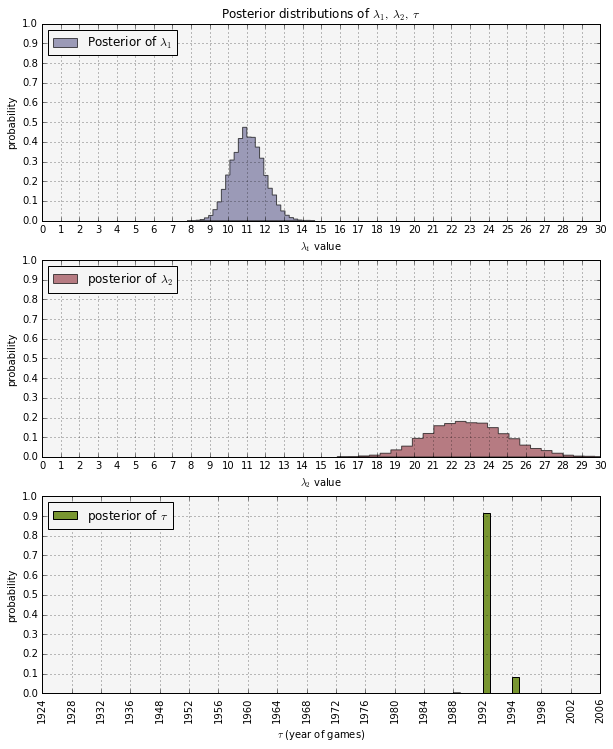

In [17]:
# our data
data = nor_medals_year
n_data = len(data)
years = data.index.values

figsize(10, 12)
xticks = np.arange(0, 31, 1)
yticks = np.arange(0.0, 1.1, 0.1)

# lambda_1
ax = plt.subplot(311)
ax.set_autoscaley_on(False)
plt.hist(lambda_1_samples, histtype='stepfilled', bins=30, alpha=0.65,
         label="Posterior of $\lambda_1$", color="#6B6A96", normed=True)
plt.legend(loc="upper left")
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel("$\lambda_1$ value")
plt.ylabel("probability");
plt.title(r"""Posterior distributions of $\lambda_1,\;\lambda_2,\;\tau$""")
plt.grid()

# lambda_2
ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=30, alpha=0.65,
         label="posterior of $\lambda_2$", color="#943A45", normed=True)
plt.legend(loc="upper left")
plt.xticks(xticks)
plt.xlim([xticks.min(), xticks.max()])
plt.yticks(yticks)
plt.xlabel("$\lambda_2$ value")
plt.ylabel("probability");
plt.grid()

# tau
ax = plt.subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(tau_samples, bins=n_data, alpha=1,
         label=r"posterior of $\tau$",
         color="#799631", weights=w, rwidth=2.)
plt.legend(loc="upper left")
plt.xticks(np.arange(n_data), years, rotation='vertical')
plt.yticks(yticks)
plt.xlabel(r"$\tau$ (year of games)")
plt.ylabel("probability");
plt.grid()

### Results
Recall that $\lambda_1$ defines the probability distribution before $\tau$.  The first plot shows $\lambda_1$ is about 11, and the probability that Norway wins 11 medals in the 1988 winter olympics would have been nearly 50%.  Further, the distribution of this plot is narrow, meaning there was low uncertainty in getting a medal count outside of the 9 to 13 range.  Unfortunately, if you based your prediction on these results, you would have been way off.  1988 was the first and only time Norway failed to win a gold medal in the winter olympics.  Norway took home a mere 5 medals. (It is important to note that the Poisson distribution is infinite.  That is, there was a probability, however small, of Norway winning 5 medals.)

In [18]:
nor_medals_year['1988']

5

How well would you have predicted the 2010 medal count?  Looking at the second plot, the value of $\lambda_2$ is about 23. The uncertainty is greater, as indicated by the wider distribution, so the highest probability was about 20% (to win 23 medals).  There was a combined probability of about 50% to win either 22, 23, or 24 medals.  As it turns out, Norway won [23 medals](http://en.wikipedia.org/wiki/2010_Winter_Olympics_medal_table) in the 2010 winter olympics?  Nice work!

What about $\tau$?  Your model validated your earlier observation that something changed in the winter olympic games starting in 1992.  The third plot shows a greater than 90% chance of a change occurring that year.  If there was no change, and $\lambda_1$ and $\lambda_2$ turned out to be similar, then the two distributions would have looked the same.

### Bonus: Olympic Events
So what changed in 1992?  That's easy to answer (at least partially).  The International Olympic Committee added more events and handed out more medals.  In fact, the number of events and medals has increased sharply since 1988.  Below is a plot showing the upward trend in both number of events and number of medals awarded in each winter games.

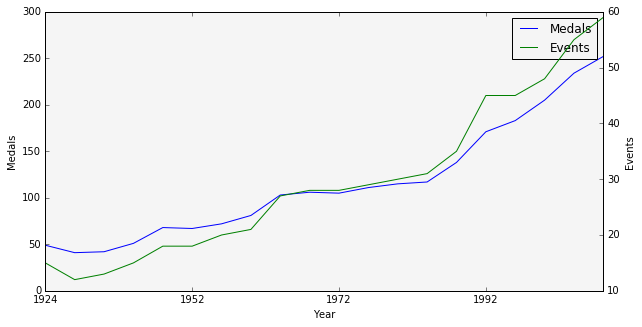

In [20]:
# plot medals awarded per games
ax = medals_df.groupby('Year').size()\
.plot(figsize=(10,5), legend=True, label='Medals')
ax.set_ylabel('Medals')

# plot events per games
events_year = medals_df.drop_duplicates(subset=['Year','Sport','Discipline','Event'])\
.groupby('Year').size()
events_year.plot(secondary_y=True, legend=True, label='Events', mark_right=False)
ax.right_ax.set_ylabel('Events')

For the curious, here are the events that have been added since 1988:

In [21]:
events_2006 = set(medals_df[medals_df.Year == '2006']\
.groupby(['Sport','Discipline','Event'])\
.groups.keys())

events_1988 = set(medals_df[medals_df.Year == '1988']\
.groupby(['Sport','Discipline','Event'])\
.groups.keys())

new_events_since_1988 = events_2006 - events_1988
new_events_since_1988

{('Biathlon', 'Biathlon', '10km pursuit'),
 ('Biathlon', 'Biathlon', '12,5km mass start'),
 ('Biathlon', 'Biathlon', '12.5km pursuit'),
 ('Biathlon', 'Biathlon', '15km'),
 ('Biathlon', 'Biathlon', '15km mass start'),
 ('Biathlon', 'Biathlon', '4x6km relay'),
 ('Biathlon', 'Biathlon', '7.5km'),
 ('Bobsleigh', 'Skeleton', 'individual'),
 ('Curling', 'Curling', 'curling'),
 ('Skating', 'Short Track S.', '1000m'),
 ('Skating', 'Short Track S.', '1500m'),
 ('Skating', 'Short Track S.', '3000m relay'),
 ('Skating', 'Short Track S.', '5000m relay'),
 ('Skating', 'Short Track S.', '500m'),
 ('Skating', 'Speed skating', 'Team pursuit'),
 ('Skiing', 'Alpine Skiing', 'Alpine combined'),
 ('Skiing', 'Cross Country S', '30km'),
 ('Skiing', 'Cross Country S', 'Combined 15 + 15km mass start'),
 ('Skiing', 'Cross Country S', 'Combined 7.5 + 7.5km mass start'),
 ('Skiing', 'Cross Country S', 'Sprint 1,5km'),
 ('Skiing', 'Cross Country S', 'Team sprint'),
 ('Skiing', 'Cross Country S', 'sprint 1.5km'),


And here are the number of medals won by Norway in these events:

In [22]:
def nor_medal_count(row):
    return (row.Sport, row.Discipline, row.Event) \
        in new_events_since_1988 \
        and row.NOC == 'NOR'    
nor_new_medals = medals_df.apply(nor_medal_count, axis=1)
len(nor_new_medals[nor_new_medals == True])

23

## Next: Share and Reuse
Our next tutorial topic will focus on how IBM Data Scientist Workbench can help you share and reuse notebooks. Visit the [Welcome](/pages/welcome) page to download **Tutorial #5 - Share and Reuse**.

## Want to learn more?

<a href="http://bigdatauniversity.com/courses/data-scientist-workbench-tutorial/?utm_source=tutorial4-analyze&utm_medium=dswb&utm_campaign=bdu"><img src = "https://ibm.box.com/shared/static/ni1of8b042gievv8a1f5iv8aqyruf8sk.png"> </a>

Created by: <a href="https://bigdatauniversity.com/?utm_source=bducreatedbylink&utm_medium=dswb&utm_campaign=bdu">The Big Data University Team</a>